<a href="https://colab.research.google.com/github/giacomocolonetti/giacomocolonetti/blob/main/me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

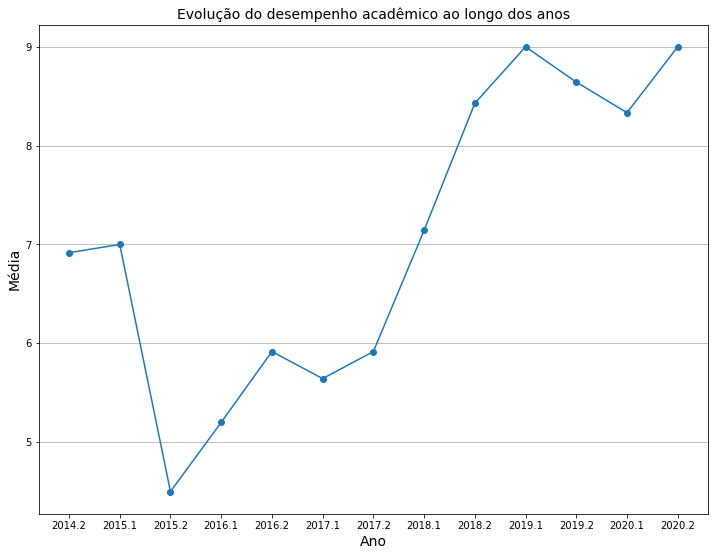

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('https://raw.githubusercontent.com/giacomocolonetti/giacomocolonetti/main/historico.json')
df['Nota'] = pd.to_numeric(df['Nota'], errors='coerce')
df.dropna(subset=['Nota'], inplace=True)
df['Avg'] = df.groupby('Semestre')['Nota'].transform('mean')

avg_df = df[['Semestre', 'Avg']].copy(deep=True)
avg_df.drop_duplicates(subset='Semestre', inplace=True)
avg_df['Semestre'] = avg_df['Semestre'].astype(str)

fig, ax1 = plt.subplots()
fig.set_size_inches(12,9)

font1 = {'size':'14'}
ax1.set_xlabel('Ano', fontdict = font1)
ax1.set_ylabel('Média', fontdict = font1)
ax1.set_title('Evolução do desempenho acadêmico ao longo dos anos', fontdict = font1)

plt.grid(axis = 'y')
plt.plot(avg_df['Semestre'], avg_df['Avg'], marker = 'o')